In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import helpers as hlp
import os
import preprocessing as prep
import models as mdl
import implementations as imp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Loading

In [3]:
path = "/Users/maelynenguyen/Desktop/ML/dataset_to_release"
abs_path = path
# os.getcwd() +
x_train_, x_test_, y_train_, train_ids_, test_ids_ = hlp.load_csv_data(abs_path)

In [4]:
x = x_train_.copy()
x_submit = x_test_.copy()
y = y_train_.copy()

In [5]:
x_train, y_train, x_test, y_test = prep.split_data(x, y, 0.8)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(262508, 321)
(65627, 321)
(262508,)


# Column Analysis

In [14]:
nan_col = (
    np.isnan(x_train).sum(axis=0) / x_train.shape[0]
)  # ratio of nan values in each column
nan_row = (
    np.isnan(x_train).sum(axis=1) / x_train.shape[1]
)  # ratio of nan values in each row

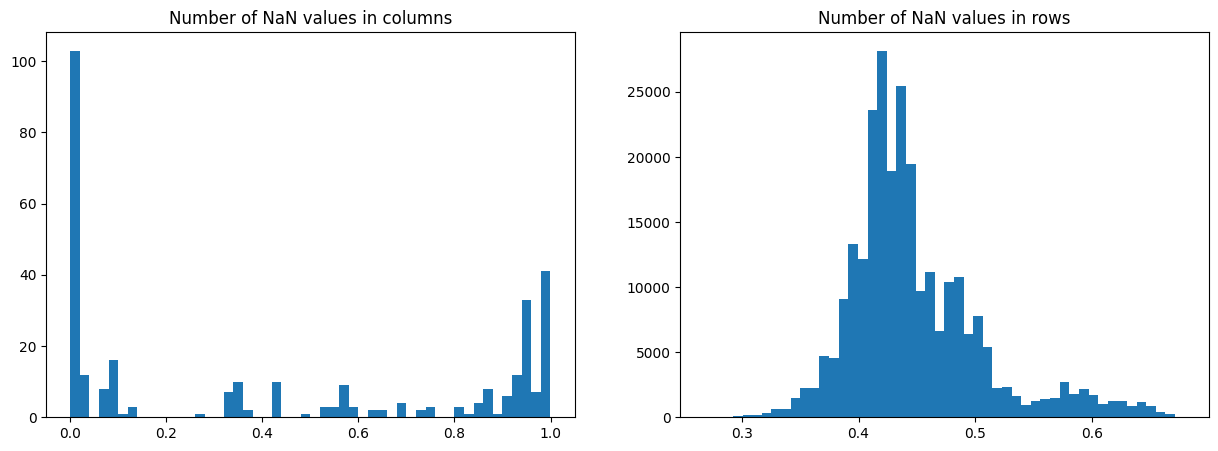

In [10]:
# plot subplots for count of nan values in columns and rows
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(nan_col, bins=50)
ax[0].set_title("Number of NaN values in columns")
ax[1].hist(nan_row, bins=50)
ax[1].set_title("Number of NaN values in rows")
plt.show()

In [67]:
print("more than 0.99 :", len(prep.correlation(x_train, 0.99)))
print("more than 0.95 :", len(prep.correlation(x_train, 0.95)))
print("more than 0.9 :", len(prep.correlation(x_train, 0.9)))
print("more than 0.8 :", len(prep.correlation(x_train, 0.8)))
print("more than 0.75 :", len(prep.correlation(x_train, 0.75)))
print("more than 0.7 :", len(prep.correlation(x_train, 0.7)))

more than 0.99 : 9
more than 0.95 : 21
more than 0.9 : 30
more than 0.8 : 33
more than 0.75 : 37
more than 0.7 : 40


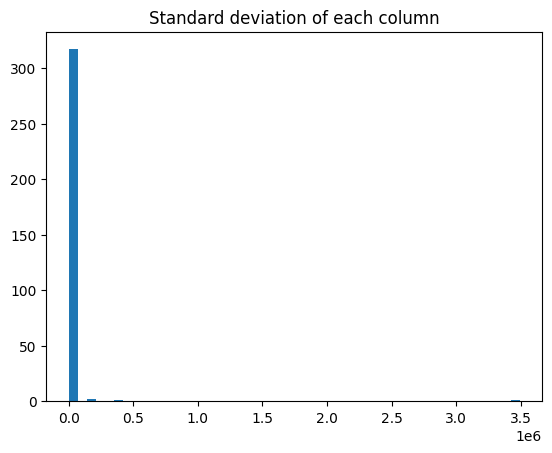

In [44]:
# plot std of each column (without nan values)
std = np.nanstd(x_train[:], axis=0)
plt.hist(std, bins=50)
plt.title("Standard deviation of each column")
plt.show()

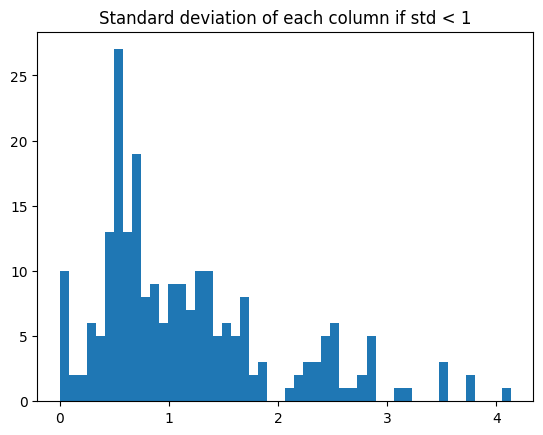

std < 1 : 10


In [63]:
# plot std of each columns if std < 1
std_1 = std[std < 5]
plt.hist(std_1, bins=50)
plt.title("Standard deviation of each column if std < 1")
plt.show()

# count std > 1
print("std < 1 :", len(std[std < 0.1]))

## Data cleaning

In [74]:
correlation_thr = 0.8
nan_thr = 0.8
std_thr = 0.1

In [75]:
x_train_cleaned, x_test_cleaned = prep.clean_data(
    x_train, x_test, correlation_thr, nan_thr, std_thr
)

Number of columns with more than 0.8 NaN: 116
Number of columns with std < 0.1: 10
Number of perfectly correlated columns: 33
Columns to drop: [2, 3, 8, 9, 10, 11, 12, 14, 18, 19, 21, 22, 41, 49, 55, 64, 74, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 219, 224, 225, 226, 240, 244, 247, 248, 249, 257, 262, 263, 264, 265, 273, 274, 275, 278, 279, 280, 281, 282, 283, 284, 288, 298, 306, 307, 308, 309, 310, 311, 312, 316, 317]
Handling NaN values...
Handling NaN values...
Number of perfectly correlated columns after c

In [76]:
x_train_cleaned.shape

(262508, 162)

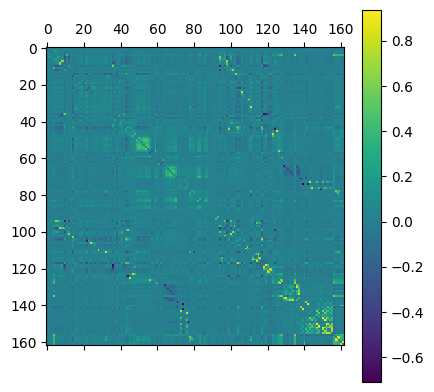

In [77]:
# plot correlation matrix
corr = np.corrcoef(x_train_cleaned, rowvar=False)
# remove diagnoal
corr = corr - np.eye(corr.shape[0])
plt.matshow(corr)
plt.colorbar()
plt.show()

In [80]:
# print the number of columns with correlation > 0.9
corr_col = np.where(corr > correlation_thr)
print(len((corr_col)))

2


In [81]:
print(x_train_cleaned.shape)
print(x_test_cleaned.shape)

(262508, 162)
(65627, 162)


# Discovering features

In [17]:
columns_to_drop = [
    3,
    8,
    9,
    10,
    11,
    12,
    14,
    18,
    19,
    21,
    22,
    55,
    109,
    110,
    111,
    112,
    113,
    114,
    115,
    116,
    117,
    119,
    120,
    121,
    122,
    123,
    124,
    125,
    127,
    128,
    129,
    130,
    131,
    132,
    133,
    134,
    135,
    137,
    138,
    139,
    140,
    141,
    142,
    143,
    144,
    145,
    146,
    147,
    148,
    149,
    150,
    151,
    152,
    153,
    154,
    155,
    156,
    157,
    158,
    159,
    160,
    161,
    162,
    163,
    164,
    165,
    166,
    167,
    168,
    169,
    170,
    171,
    172,
    173,
    174,
    175,
    176,
    177,
    178,
    180,
    182,
    183,
    184,
    185,
    186,
    187,
    188,
    189,
    190,
    191,
    194,
    195,
    196,
    197,
    203,
    204,
    205,
    206,
    207,
    208,
    209,
    210,
    211,
    212,
    213,
    214,
    215,
    219,
    240,
    244,
    247,
    248,
    249,
    257,
    265,
    274,
    278,
    279,
    280,
    281,
    282,
    283,
    288,
    298,
    307,
    308,
    309,
    317,
]

# Model testing

In [118]:
# Train Linear Regression model
w, mse = mdl.least_squares(y_train, x_train_cleaned)
print(mse)

0.47576886903834187


In [119]:
mse_test = mdl.test_model(y_test, x_test_cleaned, w)
print(mse_test)

0.4779235718669639


In [92]:
# Add intercept term (bias) to the feature matrix
X_train = np.hstack((np.ones((x_train_cleaned.shape[0], 1)), x_train_cleaned))
X_test = np.hstack((np.ones((x_test_cleaned.shape[0], 1)), x_test_cleaned))

# Initialize theta parameters
theta = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.01
num_iterations = 100

# Train logistic regression model
theta, cost_history = mdl.gradient_descent(
    X_train, y_train, theta, learning_rate, num_iterations
)

# Predictions
y_pred = mdl.predict(X_test, theta)

# Accuracy
accuracy = np.mean(y_test == y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 1.92%


In [26]:
x_train, x_test, y_train, y_test = prep.split_data(x_train_cleaned, y_train, 0.8, 1)

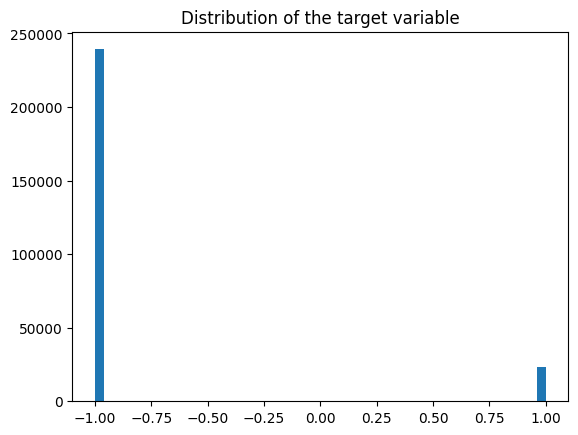

In [27]:
# plot the distribution of the target variable
plt.hist(y_train, bins=50)
plt.title("Distribution of the target variable")
plt.show()

In [29]:
# MeanSquaredError
import implementations as imp

w, loss = imp.least_squares(y_train, x_train)
y_pred = x_train.dot(w)
mse = imp.compute_mse(y_train, y_pred)
print(mse)

TypeError: test_function() missing 1 required positional argument: 'func'